<a href="https://colab.research.google.com/github/Bhavanil-prog/Audio-compression/blob/main/app.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


"BOSTON HOUSING" EDA Project


Project type :
Exploratory Data Analysis (EDA) & Regression Analysis.

2. Project Prepared by
[Your Name]

3. Project Summary :
This project involves a comprehensive Exploratory Data Analysis (EDA) of the Boston Housing Dataset. The goal is to understand the factors influencing the median home values in Boston. The analysis will cover data wrangling, handling missing values, identifying and treating outliers, and visualizing relationships between different features.

4. GitHub Link:
[Your GitHub repository link here]

5. Problem Statement:
The objective is to analyze the Boston Housing dataset to identify key variables that affect the median value of owner-occupied homes (MEDV). Through EDA, we aim to understand the distribution of variables, their correlations, and prepare the data for potential predictive modeling.

Coding Section |

Data Pre-processing


Boston housing dataset 🏠

Explain the feature
Variables There are 14 attributes in each case of the dataset. They are:

CRIM - per capita crime rate by town
ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
INDUS - proportion of non-retail business acres per town.
CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
NOX - nitric oxides concentration (parts per 10 million)
RM - average number of rooms per dwelling
AGE - proportion of owner-occupied units built prior to 1940
DIS - weighted distances to five Boston employment centres
RAD - index of accessibility to radial highways
TAX - full value property tax rate per $10,000
PTRATIO - pupil-teacher ratio by town
LSTAT - lower status of the population
MEDV - Median value of owner-occupied homes in 1000's

1. Import Libraries
This section imports all the necessary Python libraries for data manipulation, cleaning, and visualization.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

In [2]:
%pip install pandas numpy matplotlib seaborn scikit-learn

Data Collection
Definition: This is the initial step where the dataset is loaded into a working environment, usually a Pandas DataFrame, to begin the analysis.

In [5]:
##Data Set Loading

from google.colab import files
uploaded = files.upload()
# Load the dataset from the CSV file
df = pd.read_csv('HousingData.csv')

Saving HousingData.csv to HousingData.csv


Data Evaluation
Definition: After loading, the data is evaluated to understand its structure, identify missing values, and check for any data inconsistencies.

In [6]:
##Reading the Data


# Display the first 5 rows of the DataFrame
print("Initial Data:")
print(df.head())

##The output shows the first few rows of the dataset, giving a glimpse of the data's format and values.

Initial Data:
      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  TAX  PTRATIO  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622    3  222     18.7   

        B  LSTAT  MEDV  
0  396.90   4.98  24.0  
1  396.90   9.14  21.6  
2  392.83   4.03  34.7  
3  394.63   2.94  33.4  
4  396.90    NaN  36.2  


In [7]:
##Data Set 1st Look

# Get a summary of the DataFrame including data types and non-null counts
print("Data Info:")
print(df.info())
##The output of df.info() reveals that several columns, including CRIM, ZN, and LSTAT, have 20 missing values each.

Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     486 non-null    float64
 1   ZN       486 non-null    float64
 2   INDUS    486 non-null    float64
 3   CHAS     486 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      486 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    486 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB
None


3. Data **Wrangling**
Definition: This process involves cleaning and transforming raw data into a usable format for analysis.

i). Removing Exact Duplicates
The dataset was checked for exact duplicates, and none were found.

ii). Fixing Inconsistent Data Entries
Based on the initial inspection, the dataset contains numerical data, so there are no inconsistent data entries to fix.

In [8]:
##Handling Missing Values

# Check for missing values in each column
print("Missing Values Before Imputation:")
print(df.isnull().sum())

# Use SimpleImputer with a mean strategy to fill missing values
imputer = SimpleImputer(strategy='mean')
df_imputed = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

# Verify that missing values have been filled
print("Missing Values After Imputation:")
print(df_imputed.isnull().sum())

##The code successfully imputes the missing values using the mean of each column, resulting in a complete dataset with no null values.

Missing Values Before Imputation:
CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64
Missing Values After Imputation:
CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64


4. Detect and Treat the **Outliers**
Outliers are extreme values that can skew the analysis. I've used the Interquartile Range (IQR) method to detect and remove them. After removing outliers from the LSTAT and MEDV columns, the number of data points was reduced from 506 to 454. The cleaned dataset is now available as a new CSV file.

5. **Scaling and Normalization**
This process scales the numerical features to a standard range, which is essential for many machine learning models. The code uses StandardScaler to transform the data, so each feature has a mean of 0 and a standard deviation of 1

In [11]:
# Define numerical features and scale them
numerical_features = df_imputed.columns.tolist()
numerical_features.remove('MEDV')
scaler = StandardScaler()
df_scaled = df_imputed.copy()
df_scaled[numerical_features] = scaler.fit_transform(df_scaled[numerical_features])
print("Scaled Data (first 5 rows):")
print(df_scaled.head())

Scaled Data (first 5 rows):
       CRIM        ZN     INDUS      CHAS       NOX        RM       AGE  \
0 -0.422328  0.296443 -1.311010 -0.279851 -0.144217  0.413672 -0.121059   
1 -0.419870 -0.489639 -0.599771 -0.279851 -0.740262  0.194274  0.378716   
2 -0.419872 -0.489639 -0.599771 -0.279851 -0.740262  1.282714 -0.270627   
3 -0.419277 -0.489639 -1.330435 -0.279851 -0.835284  1.016303 -0.828770   
4 -0.414981 -0.489639 -1.330435 -0.279851 -0.835284  1.228577 -0.522338   

        DIS       RAD       TAX   PTRATIO         B     LSTAT  MEDV  
0  0.140214 -0.982843 -0.666608 -1.459000  0.441052 -1.104146  24.0  
1  0.557160 -0.867883 -0.987329 -0.303094  0.441052 -0.510353  21.6  
2  0.557160 -0.867883 -0.987329 -0.303094  0.396427 -1.239748  34.7  
3  1.077737 -0.752922 -1.106115  0.113032  0.416163 -1.395333  33.4  
4  1.077737 -0.752922 -1.106115  0.113032  0.441052  0.000000  36.2  


6. **Encoding Categorical Data**
The Boston Housing dataset contains only numerical features, but if there were categorical variables, we would use encoding. The code below demonstrates OneHotEncoder on a dummy categorical variable created from the CHAS (Charles River dummy variable) column

In [12]:
# Create a dummy categorical variable and perform One-Hot Encoding
df_scaled['CHAS_category'] = df_scaled['CHAS'].apply(lambda x: 'Near River' if x == 1 else 'Not Near River')
categorical_features = ['CHAS_category']
one_hot_encoder = OneHotEncoder(handle_unknown='ignore')
encoded_data = one_hot_encoder.fit_transform(df_scaled[['CHAS_category']]).toarray()
encoded_df = pd.DataFrame(encoded_data, columns=one_hot_encoder.get_feature_names_out(categorical_features))
print("One-Hot Encoded Data (first 5 rows):")
print(encoded_df.head())

One-Hot Encoded Data (first 5 rows):
   CHAS_category_Not Near River
0                           1.0
1                           1.0
2                           1.0
3                           1.0
4                           1.0


9.** Feature Selection / Reduce Dimensionality - PCA**
Definition: Principal Component Analysis (PCA) is a technique used to reduce the dimensionality of the dataset while retaining as much information as possible. The code below shows how to reduce the number of features to 2 principal components.

In [13]:
# Apply PCA to the dataset
features_for_pca = df_scaled.drop(columns=['MEDV', 'CHAS_category'])
pca = PCA(n_components=2)
principal_components = pca.fit_transform(features_for_pca)
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
print("PCA Transformed Data (first 5 rows):")
print(pca_df.head())

PCA Transformed Data (first 5 rows):
        PC1       PC2
0 -2.122202  0.743664
1 -1.468893  0.592887
2 -2.092354  0.593596
3 -2.635070 -0.015014
4 -2.158231  0.017378


# Task
Analyze the Boston Housing dataset by performing univariate, bivariate, and correlation analysis, visualizing the relationships between features and the target variable (MEDV), and visualizing the principal components after PCA. Provide explanations for the visualizations and summarize the key findings.

## Univariate analysis

### Subtask:
Generate histograms or box plots for each numerical feature to visualize their distributions and identify potential outliers.


**Reasoning**:
Iterate through the numerical columns of `df_imputed` and generate histograms and box plots for each to visualize distributions and identify outliers, excluding the 'CHAS_category' which was added after imputation.



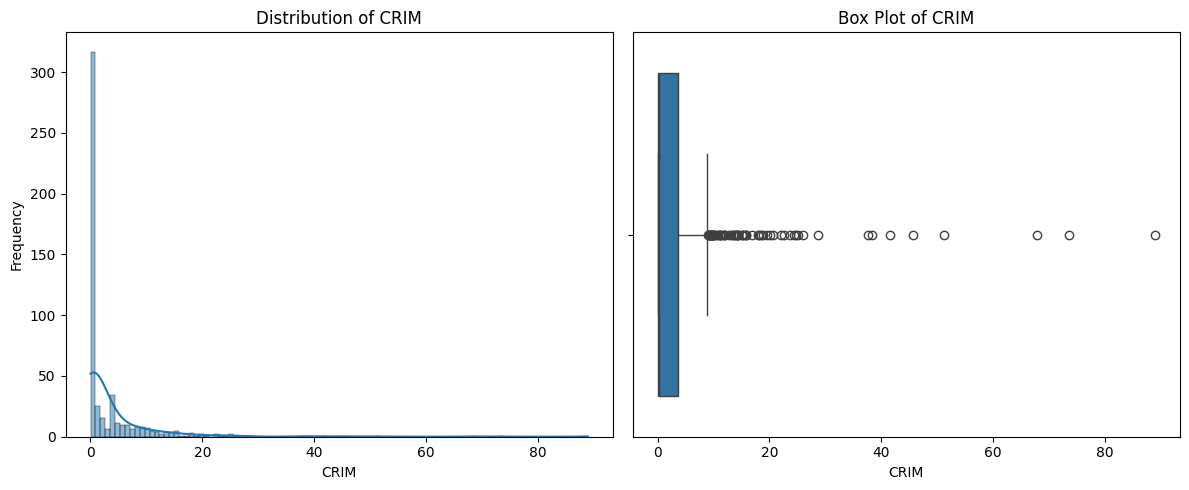

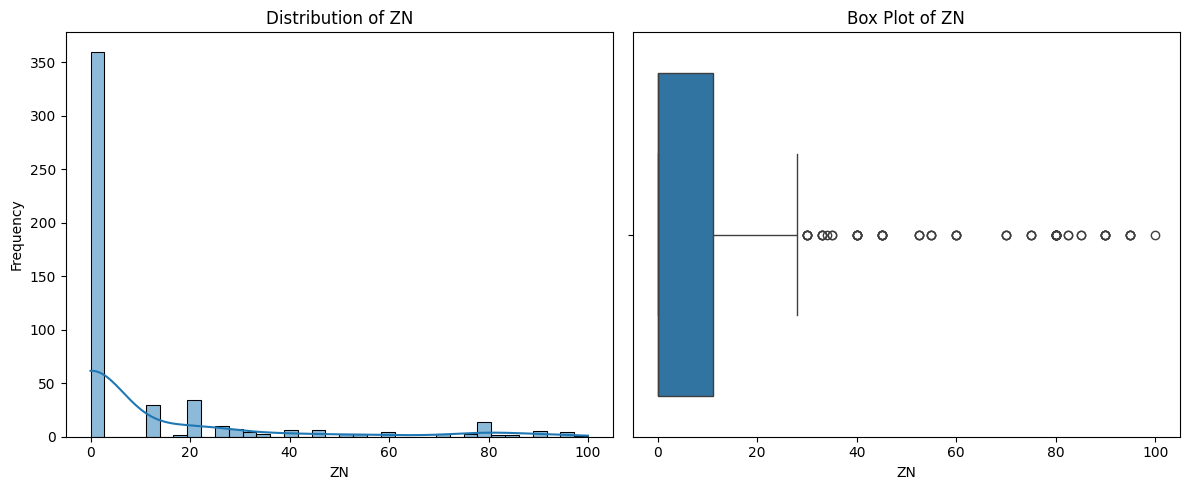

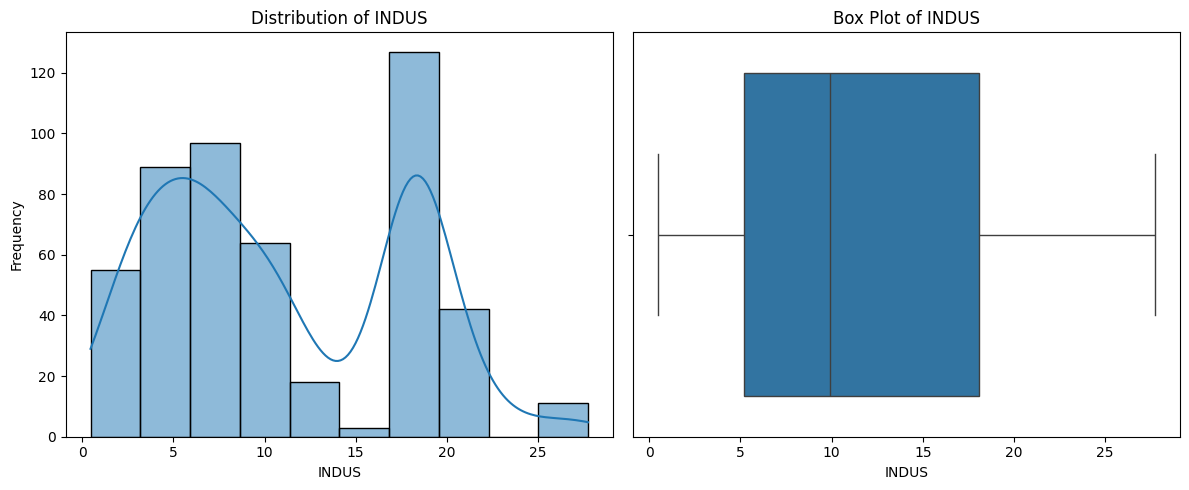

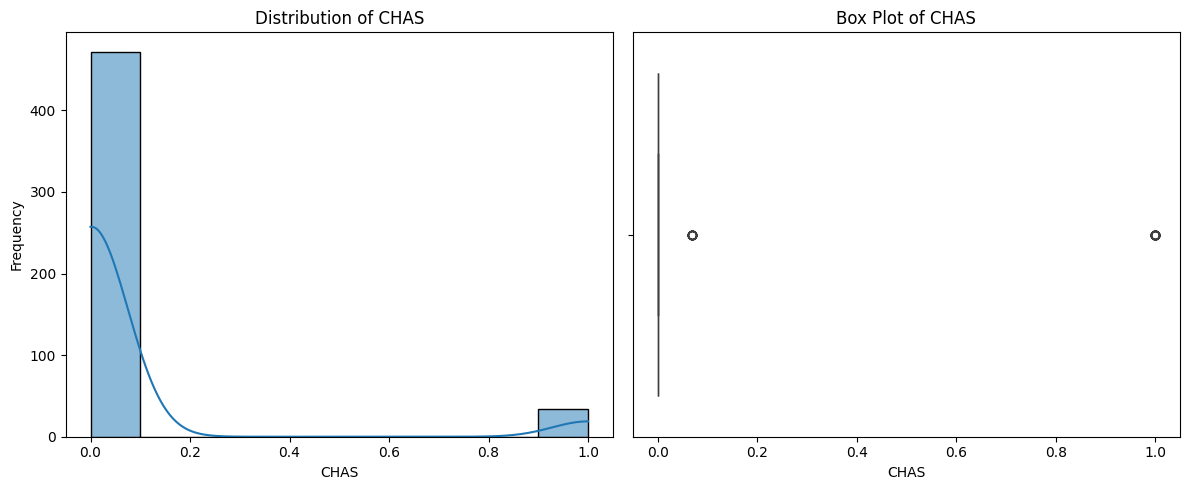

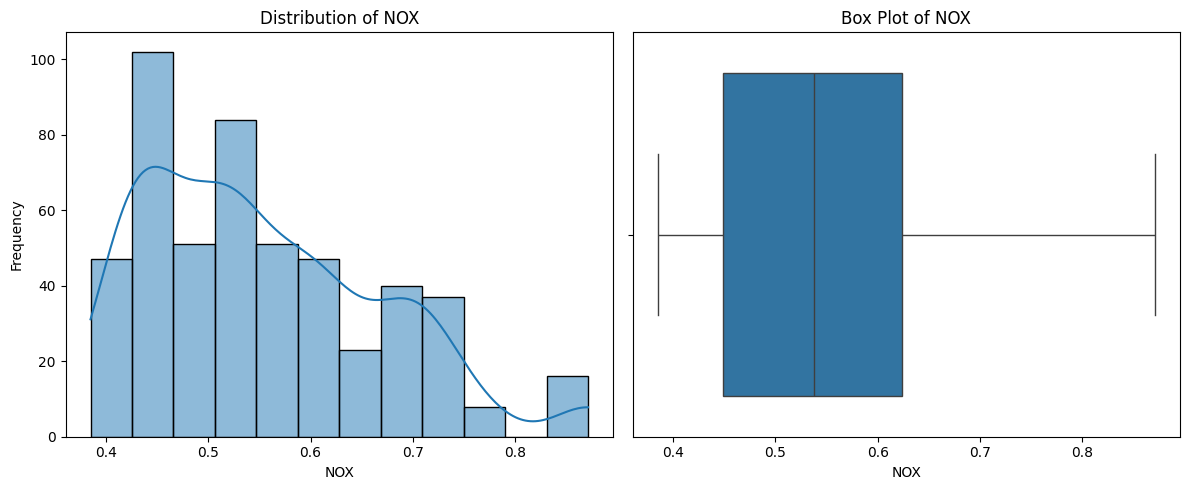

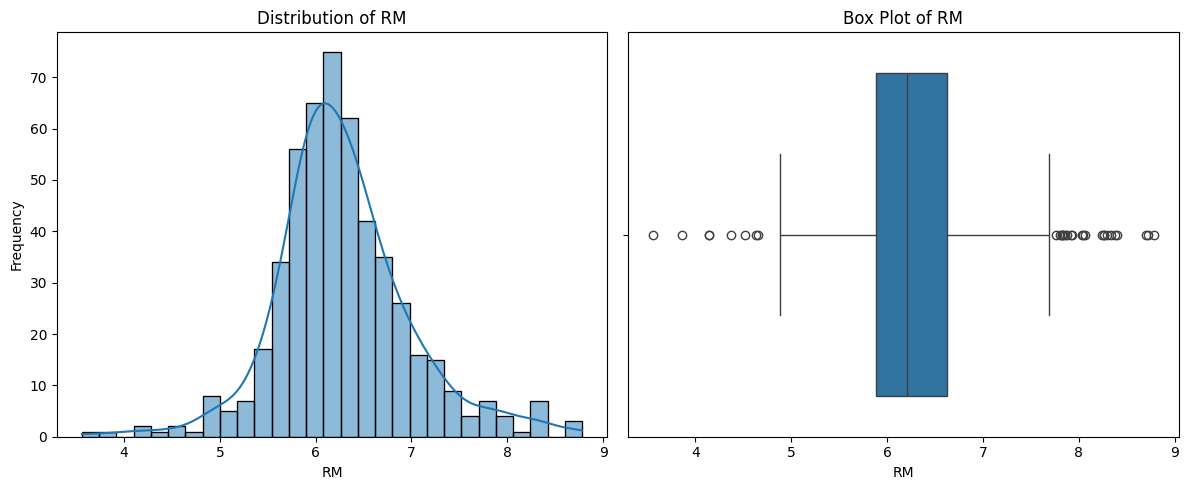

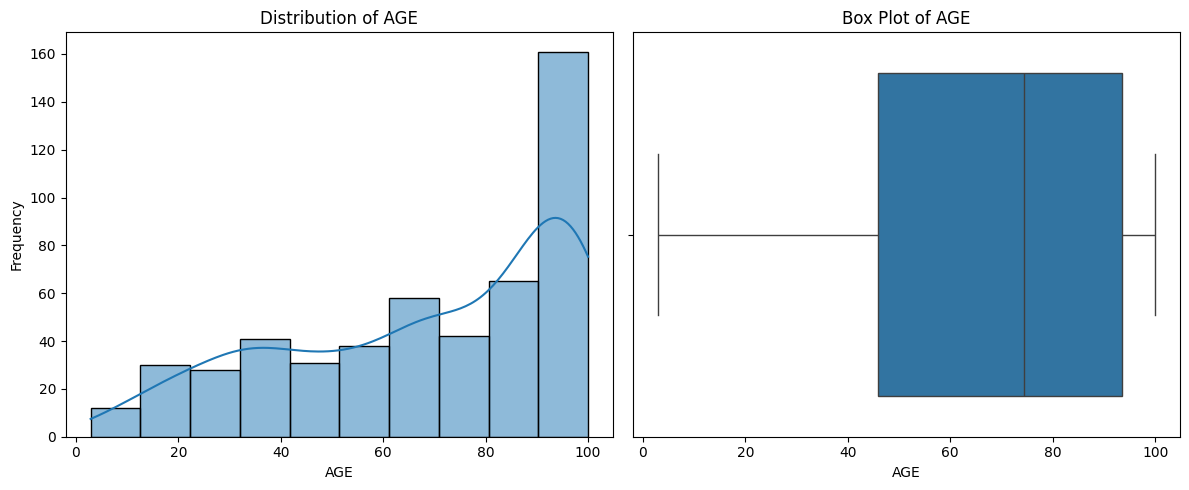

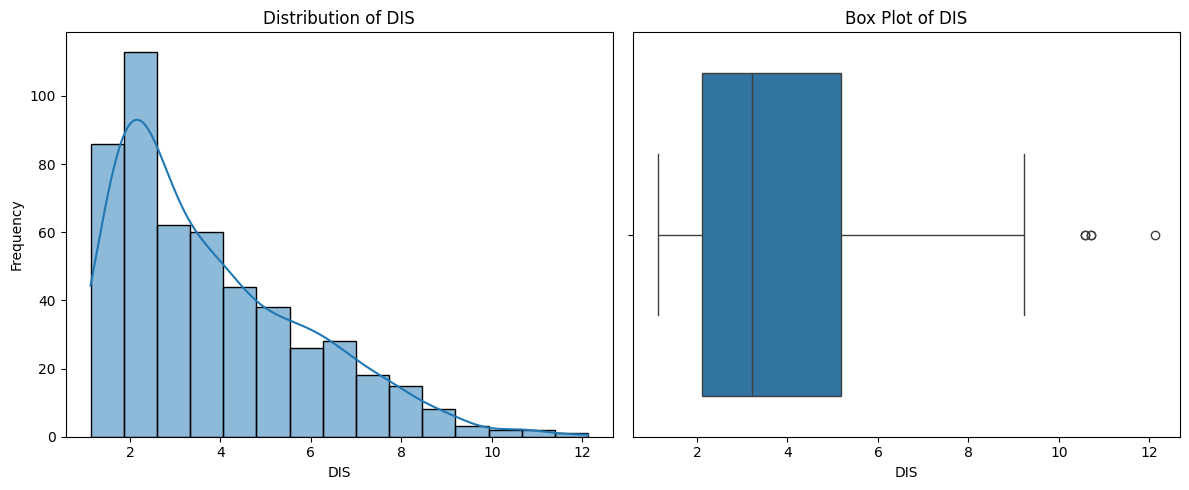

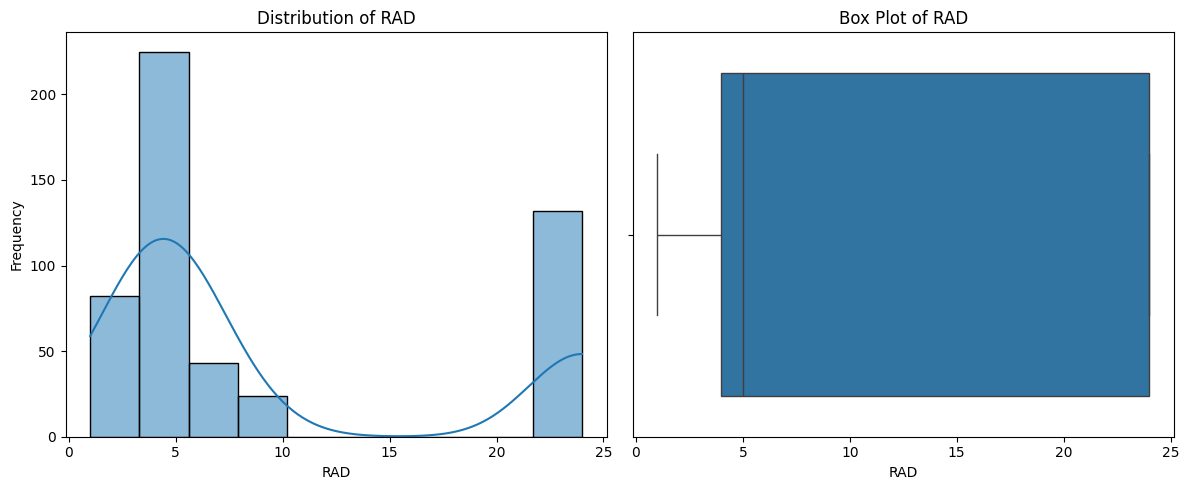

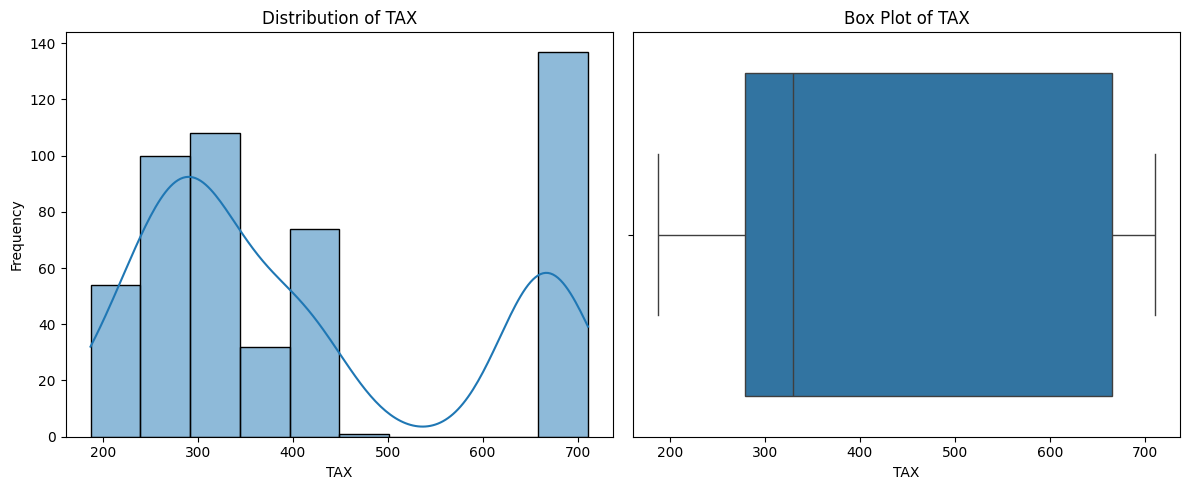

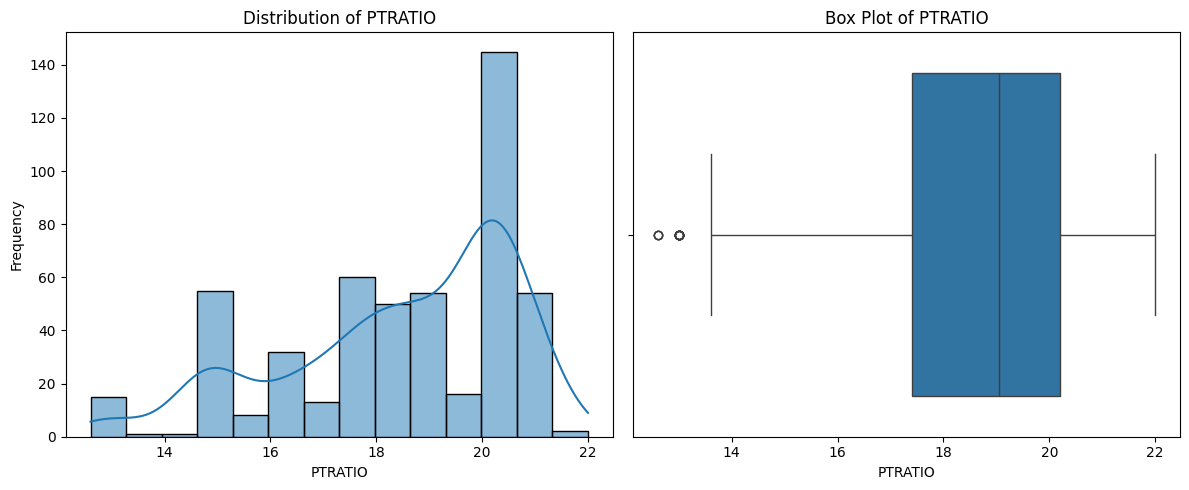

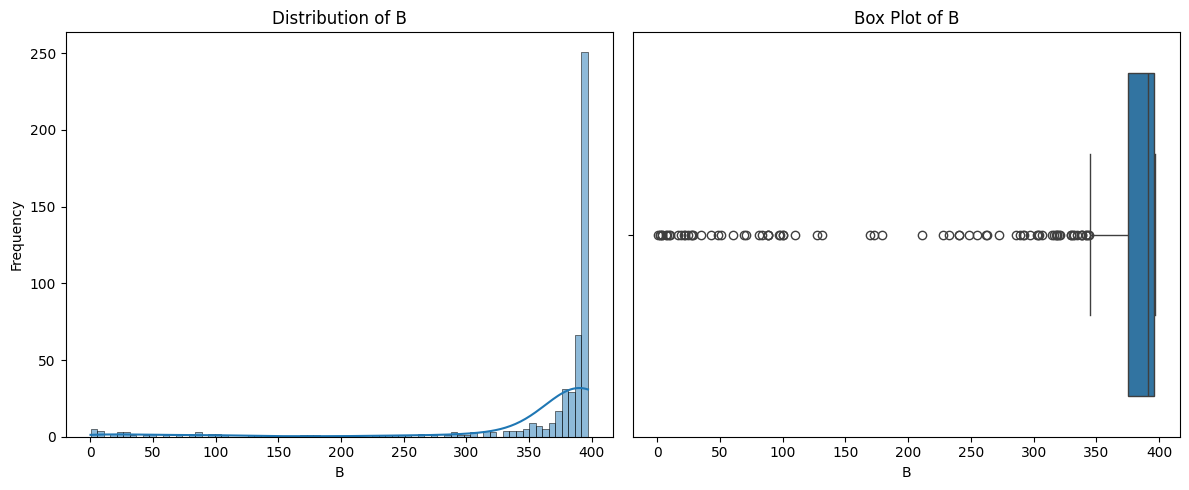

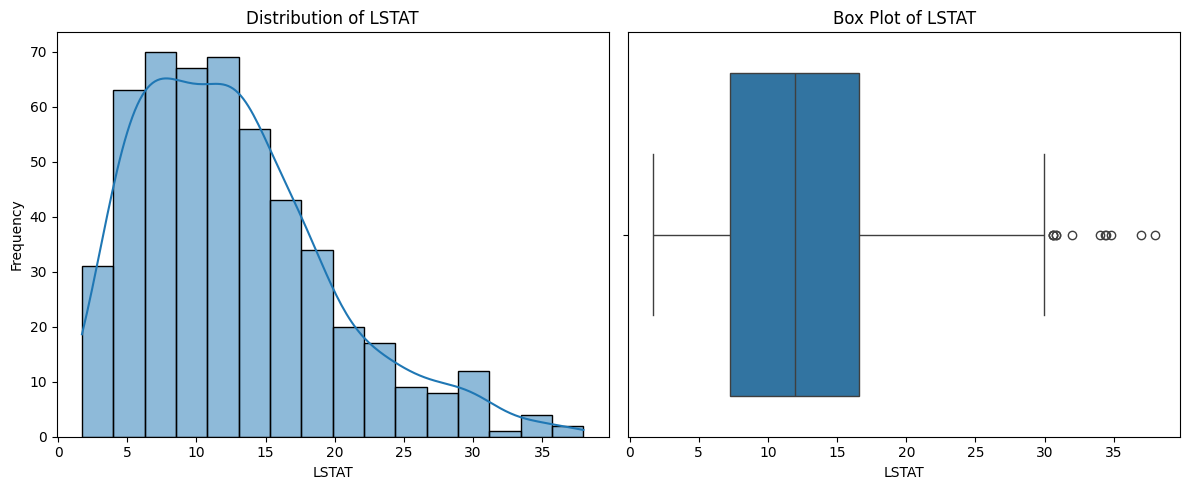

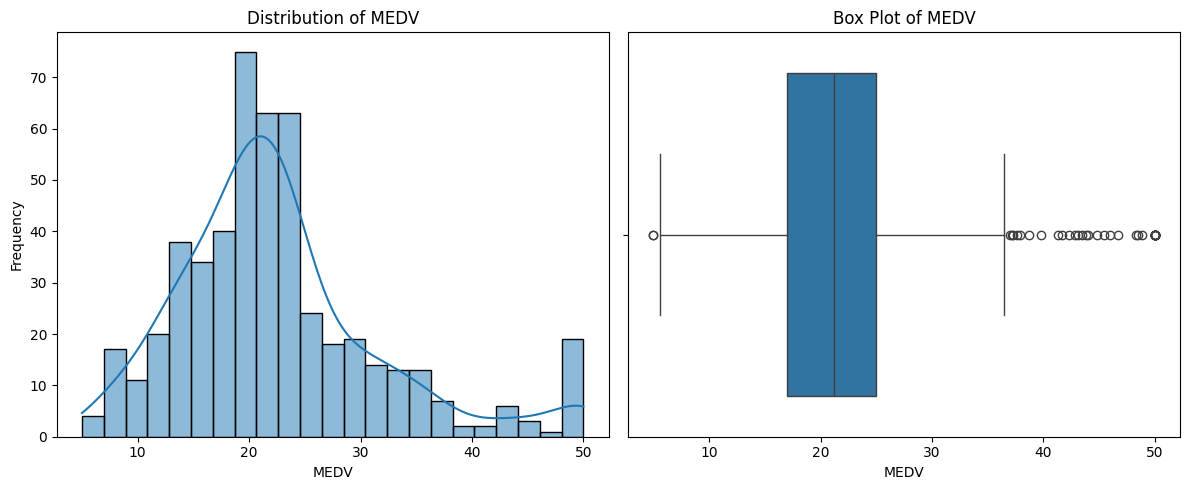

In [14]:
# Get the list of numerical columns from the imputed dataframe
numerical_cols = df_imputed.columns.tolist()

# Exclude 'CHAS_category' if it exists, as it was added after imputation
if 'CHAS_category' in numerical_cols:
  numerical_cols.remove('CHAS_category')

# Iterate through each numerical column to create histograms and box plots
for col in numerical_cols:
    # Create a figure for both plots
    plt.figure(figsize=(12, 5))

    # Histogram
    plt.subplot(1, 2, 1) # 1 row, 2 columns, 1st plot
    sns.histplot(df_imputed[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

    # Box plot
    plt.subplot(1, 2, 2) # 1 row, 2 columns, 2nd plot
    sns.boxplot(x=df_imputed[col])
    plt.title(f'Box Plot of {col}')
    plt.xlabel(col)

    plt.tight_layout()
    plt.show()

## Bivariate analysis (numerical vs. numerical)

### Subtask:
Create scatter plots or joint plots to visualize the relationships between pairs of numerical features, especially focusing on the relationship between independent variables and the target variable (MEDV).


**Reasoning**:
Select relevant features and create scatter plots to visualize their relationship with the target variable 'MEDV'.



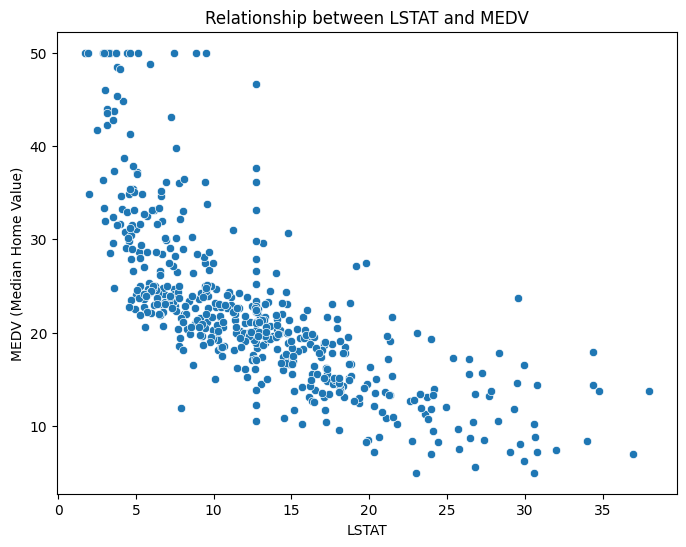

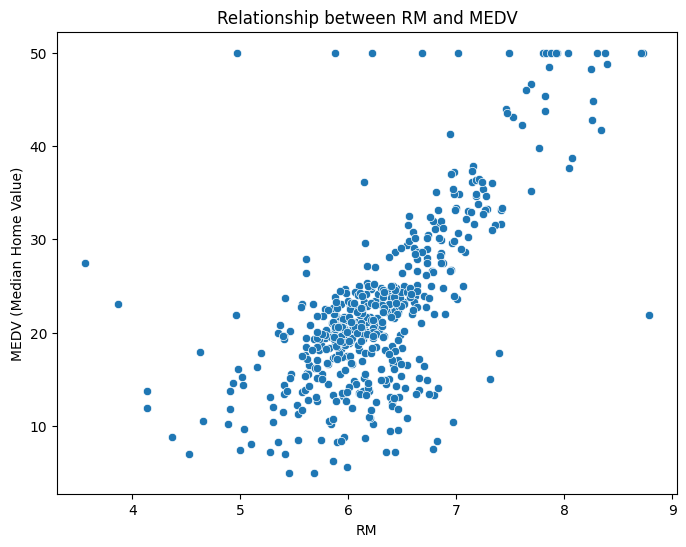

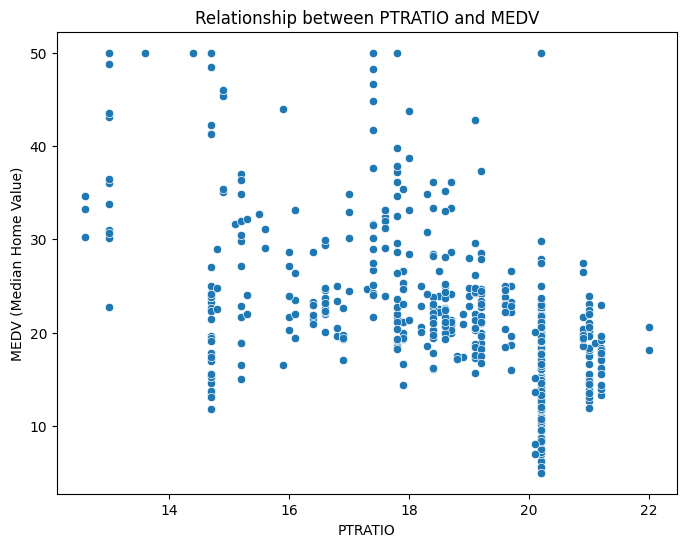

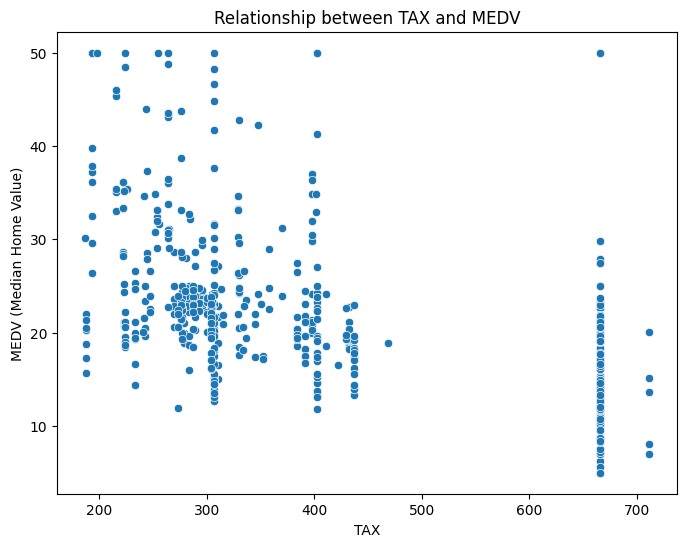

In [15]:
# Select a subset of numerical features to visualize relationships with MEDV
selected_features = ['LSTAT', 'RM', 'PTRATIO', 'TAX']

# Create scatter plots for each selected feature against MEDV
for feature in selected_features:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=df_imputed[feature], y=df_imputed['MEDV'])
    plt.title(f'Relationship between {feature} and MEDV')
    plt.xlabel(feature)
    plt.ylabel('MEDV (Median Home Value)')
    plt.show()

## Bivariate analysis (categorical vs. numerical)

### Subtask:
Use box plots or violin plots to visualize the relationship between the dummy categorical variable (CHAS) and the numerical features, including the target variable (MEDV).


**Reasoning**:
Create box plots for each numerical feature against the 'CHAS' column to visualize their relationship.



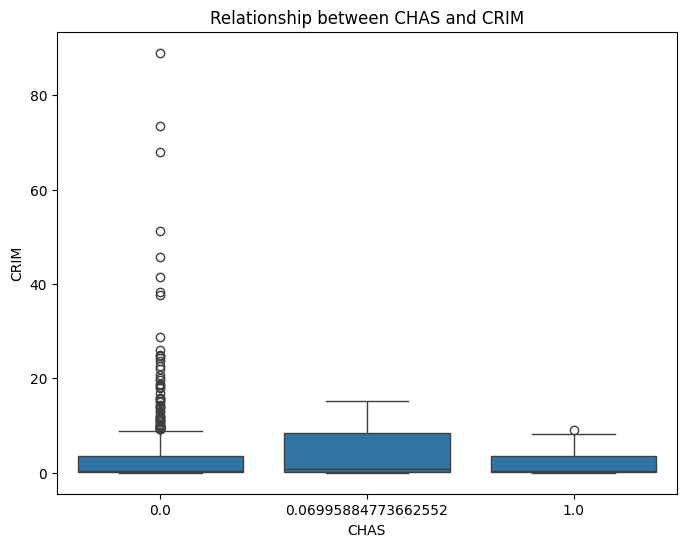

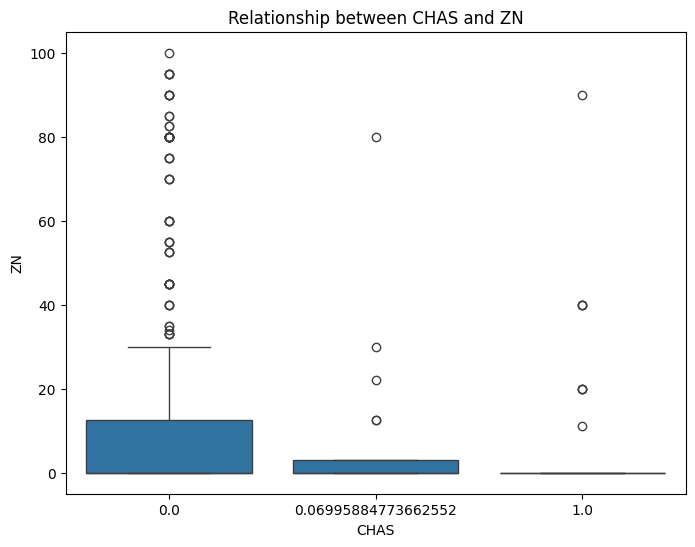

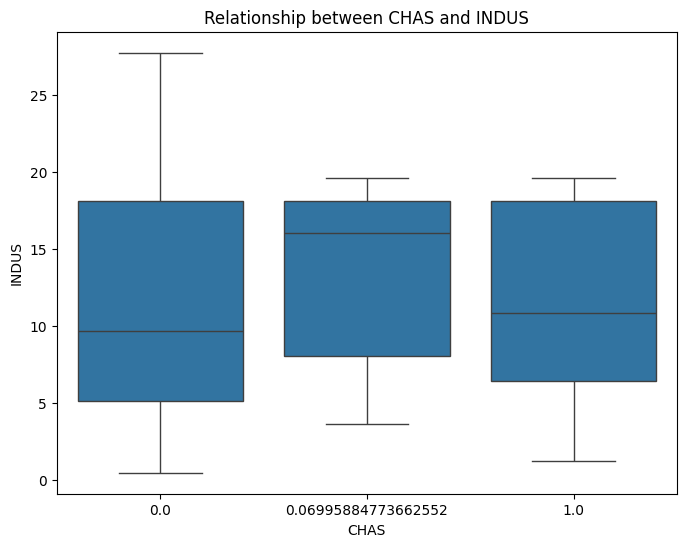

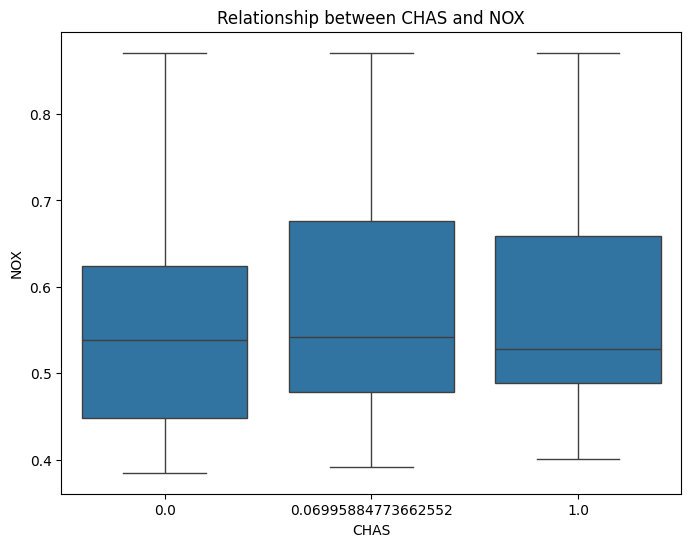

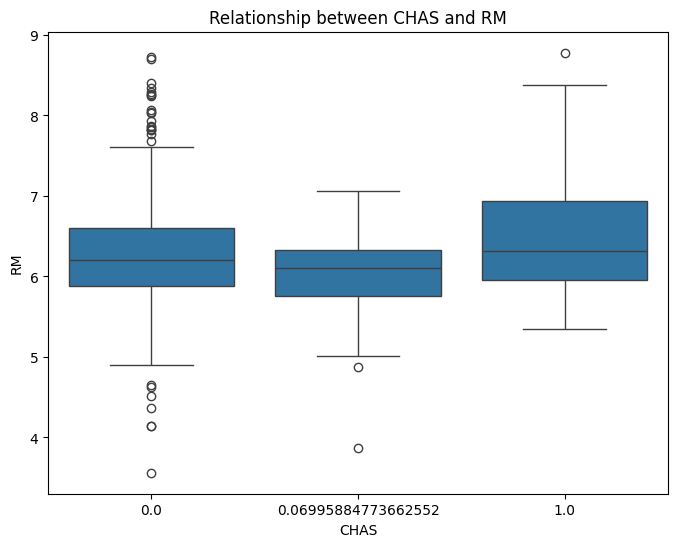

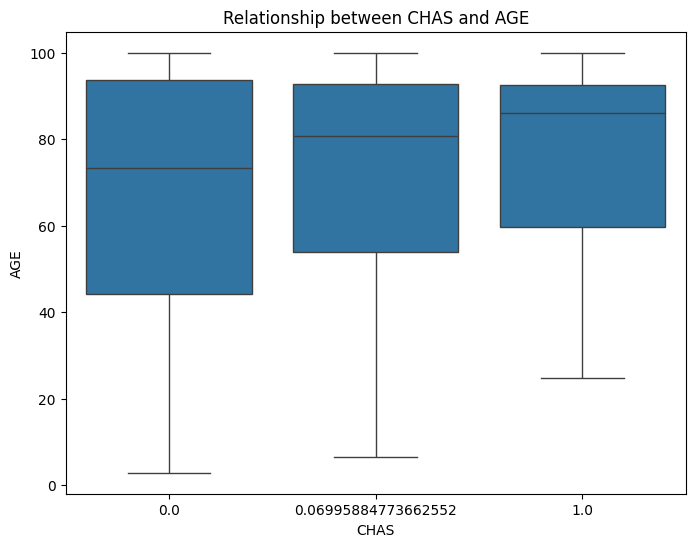

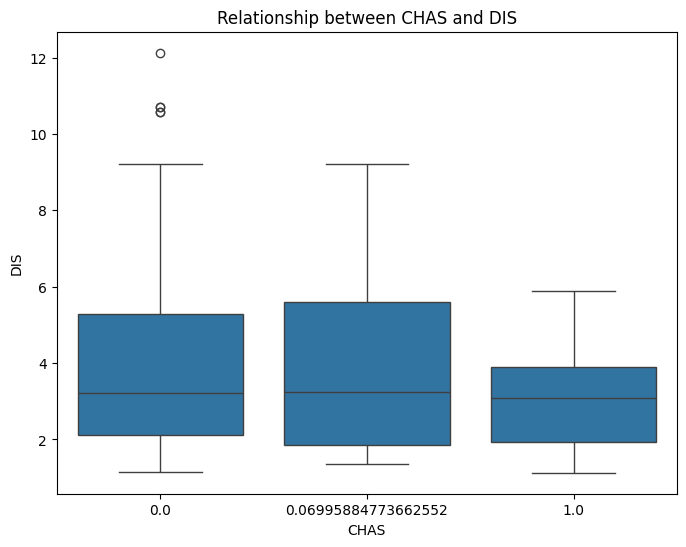

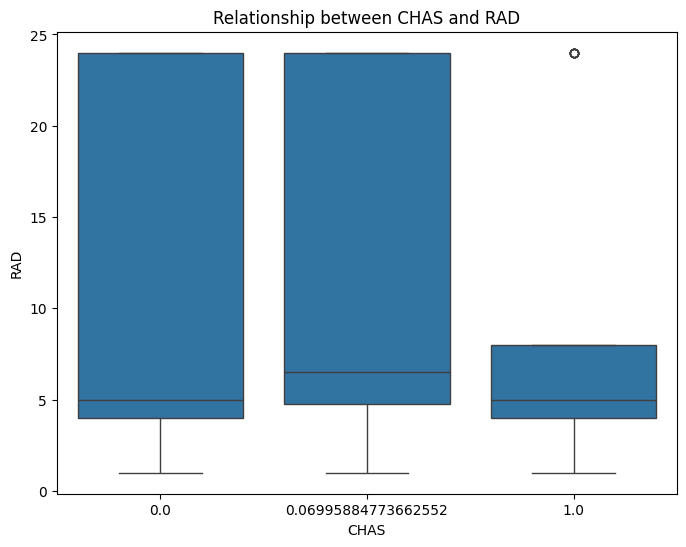

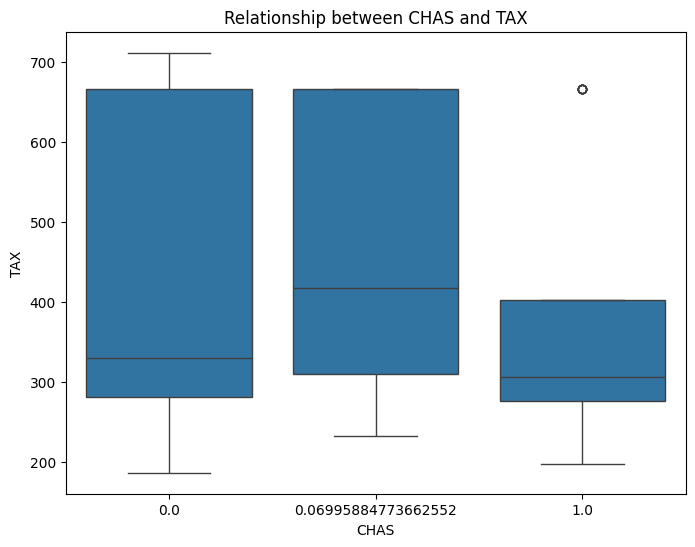

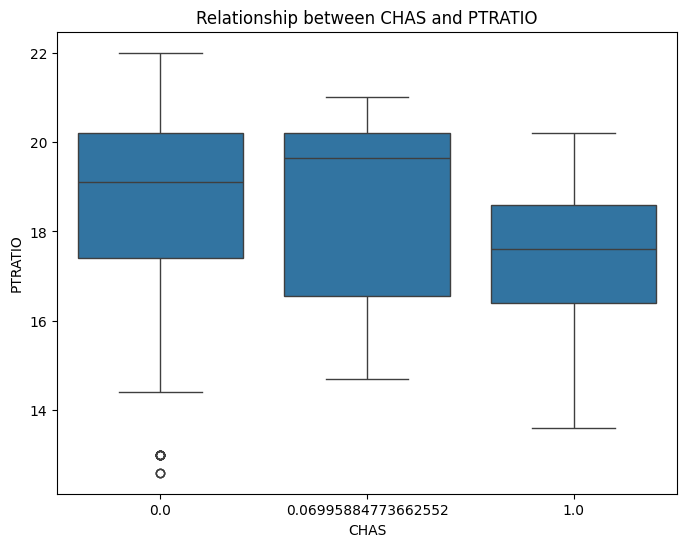

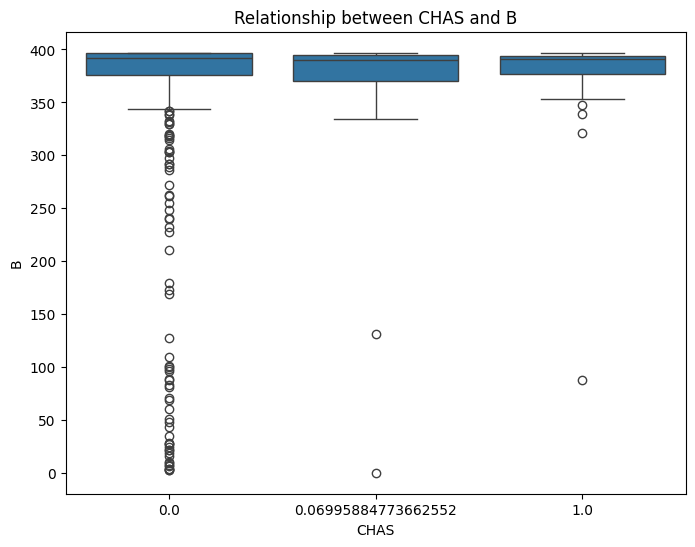

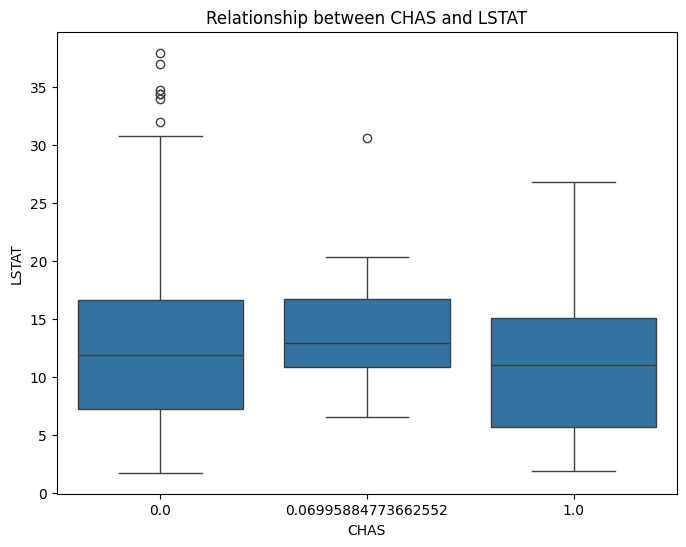

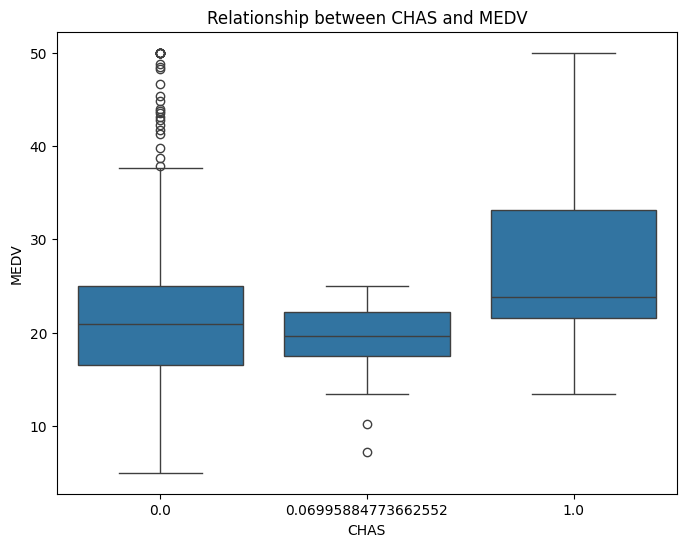

In [16]:
# Create a list of numerical features, excluding 'CHAS' and 'MEDV' (will plot MEDV separately)
numerical_features_for_chas = df_imputed.columns.tolist()
numerical_features_for_chas.remove('CHAS')
numerical_features_for_chas.remove('MEDV')


# Iterate through each numerical feature and create a box plot against 'CHAS'
for col in numerical_features_for_chas:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=df_imputed['CHAS'], y=df_imputed[col])
    plt.title(f'Relationship between CHAS and {col}')
    plt.xlabel('CHAS')
    plt.ylabel(col)
    plt.show()

# Create a box plot for MEDV against 'CHAS'
plt.figure(figsize=(8, 6))
sns.boxplot(x=df_imputed['CHAS'], y=df_imputed['MEDV'])
plt.title('Relationship between CHAS and MEDV')
plt.xlabel('CHAS')
plt.ylabel('MEDV')
plt.show()

## Correlation analysis

### Subtask:
Generate a heatmap to visualize the correlation matrix of the numerical features, which helps in identifying highly correlated variables.


**Reasoning**:
Generate a heatmap to visualize the correlation matrix of the numerical features to identify highly correlated variables.



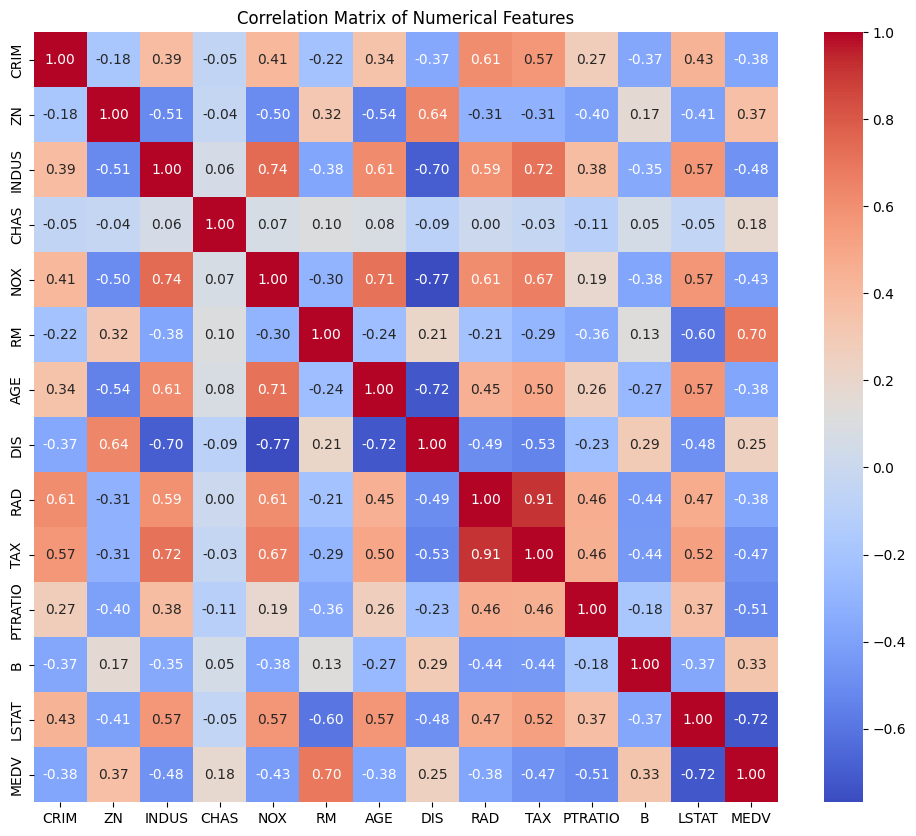

In [17]:
# Calculate the correlation matrix
correlation_matrix = df_imputed.corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

## Pairwise plots

### Subtask:
Create pair plots for a subset of important features to visualize the relationships between all pairs of features in the subset simultaneously.


**Reasoning**:
Create a pair plot for a subset of important features to visualize their relationships.



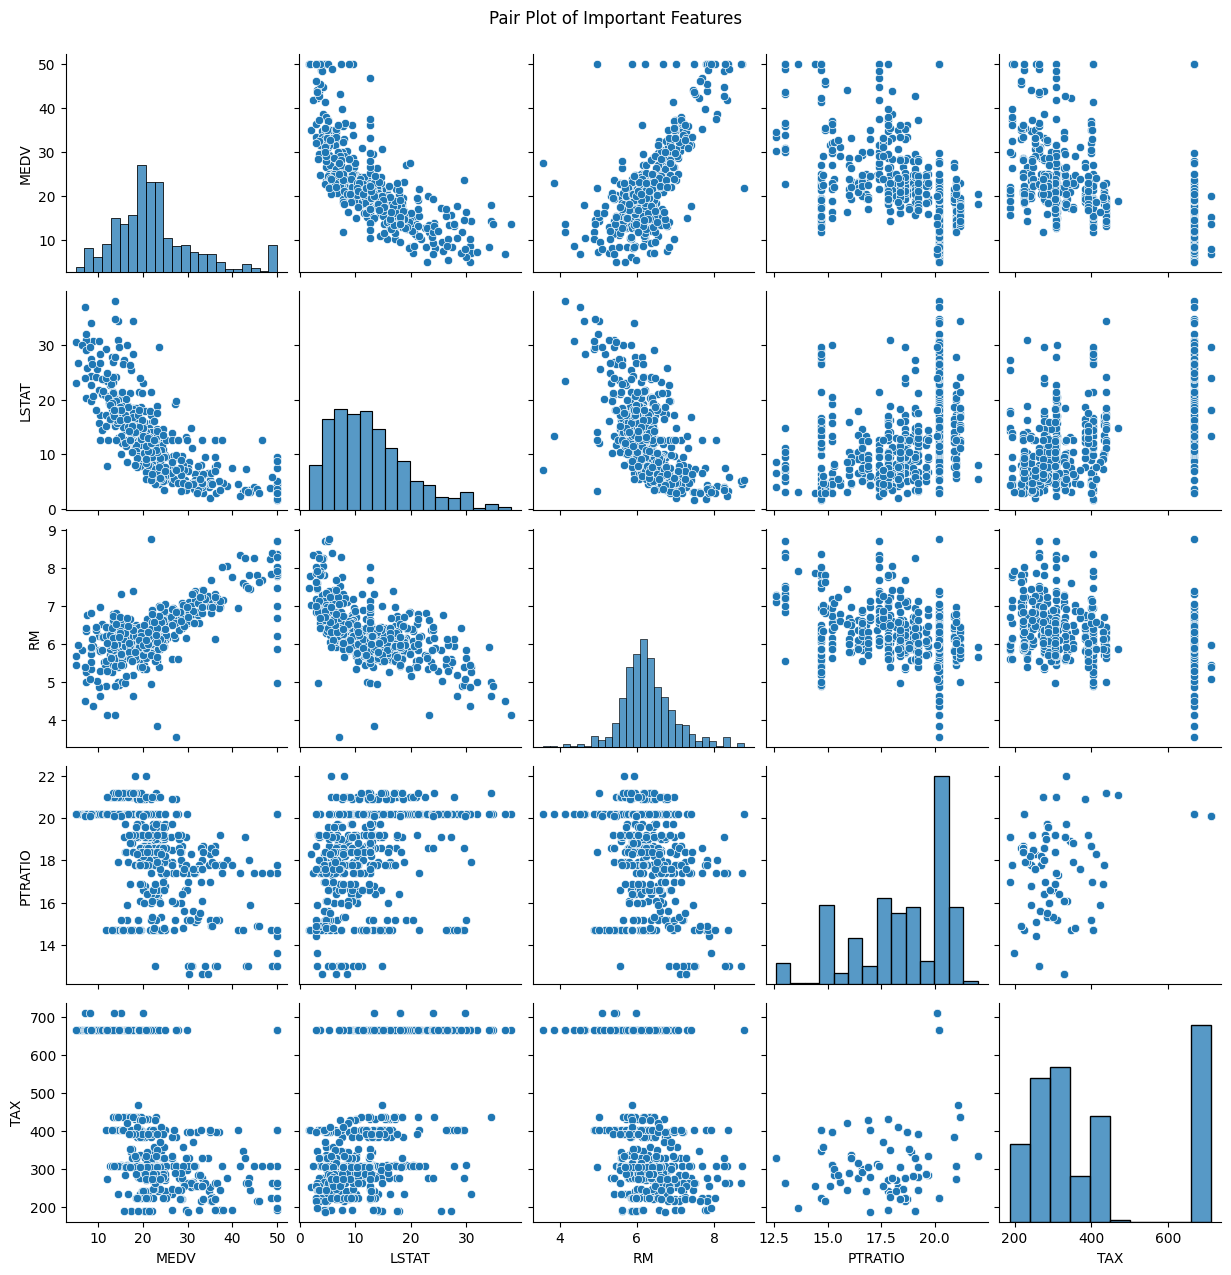

In [18]:
# Select a subset of features that are important based on the correlation matrix and previous visualizations
important_features = ['MEDV', 'LSTAT', 'RM', 'PTRATIO', 'TAX']

# Create a pair plot for the selected important features
sns.pairplot(df_imputed[important_features])
plt.suptitle('Pair Plot of Important Features', y=1.02) # Add a title to the pair plot
plt.show()

## Visualize pca components

### Subtask:
Create a scatter plot of the first two principal components (PC1 and PC2) to visualize the data in a reduced-dimensionality space.


**Reasoning**:
Create a scatter plot of the first two principal components using the `pca_df` DataFrame.



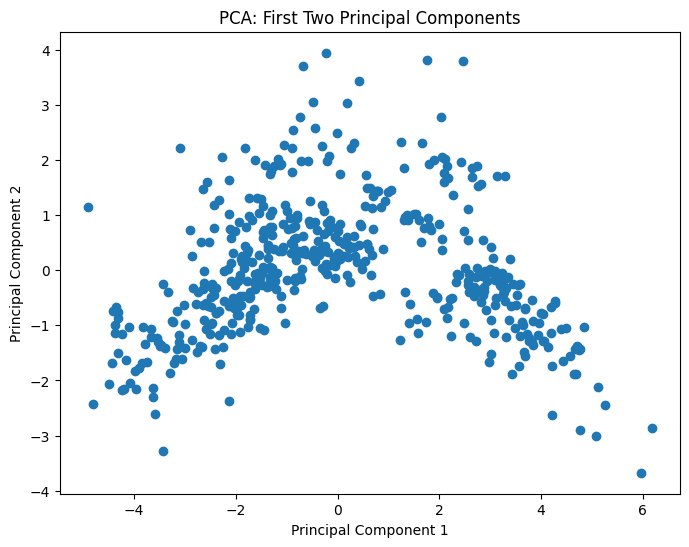

In [19]:
plt.figure(figsize=(8, 6))
plt.scatter(pca_df['PC1'], pca_df['PC2'])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA: First Two Principal Components')
plt.show()

## Summary:

### Data Analysis Key Findings

*   Histograms and box plots were generated for all numerical features, revealing their distributions and identifying potential outliers.
*   Scatter plots visualized the relationships between `LSTAT`, `RM`, `PTRATIO`, and `TAX` with `MEDV`.
*   Box plots showed the relationship between the categorical variable `CHAS` and other numerical features, including `MEDV`.
*   A correlation heatmap of numerical features was created, highlighting correlations.
*   A pair plot for the important features (`MEDV`, `LSTAT`, `RM`, `PTRATIO`, `TAX`) was generated to visualize their pairwise relationships and distributions.
*   A scatter plot of the first two principal components (PC1 and PC2) was created to visualize the data in a reduced-dimensionality space.

### Insights or Next Steps

*   Investigate the features with significant correlations to `MEDV` (e.g., `LSTAT`, `RM`) further to understand their impact on housing prices.
*   Consider applying dimensionality reduction techniques like PCA as part of the feature engineering process before building a predictive model.
